<a href="https://colab.research.google.com/github/CARC2806/Data-Analytics-and-Artificial-Intelligence-Tools-I-Gpo-101-/blob/main/A00833458_3rd_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3rd Evaluation**

In [122]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor

##**1. Reality Data Collection**

I will be using a .csv file containing the daily historical data for the stock "AAPL" which belongs to the Apple company

##**2. Processing Data**

In [123]:
#Use pandas to save the dataframe in a variable apple
apple = pd.read_csv(r'Apple.csv')
apple

,Date,Close/Last,Volume,Open,High,Low
0,09/06/2024,$220.82,48423010,$223.95,$225.24,$219.77
1,09/05/2024,$222.38,36615400,$221.625,$225.48,$221.52
2,09/04/2024,$220.85,43840200,$221.66,$221.78,$217.48
3,09/03/2024,$222.77,50190570,$228.55,$229.00,$221.17
4,08/30/2024,$229.00,52990770,$230.19,$230.40,$227.48
...,...,...,...,...,...,...
1254,09/12/2019,$55.7713,128906680,$56.20,$56.605,$55.715
1255,09/11/2019,$55.8975,177158600,$54.5175,$55.9275,$54.4325
1256,09/10/2019,$54.175,127111720,$53.465,$54.195,$52.9275
1257,09/09/2019,$53.5425,109237600,$53.71,$54.11,$52.7675


In [124]:
#Checks the data types for the df.
apple.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [125]:
#Erases the $ sign from the columns so that I can change the data type to float
apple['Close/Last'] = apple['Close/Last'].replace({'\$': ''}, regex=True).astype(float)
apple['Open'] = apple['Open'].replace({'\$': ''}, regex=True).astype(float)
apple['High'] = apple['High'].replace({'\$': ''}, regex=True).astype(float)
apple['Low'] = apple['Low'].replace({'\$': ''}, regex=True).astype(float)
apple['Volume'] = apple['Volume'].astype(int)
#Sets the date as the index and changes the data type of the index to date
apple.set_index('Date', inplace=True)
apple.index = pd.to_datetime(apple.index)
apple.dtypes

,0
Close/Last,float64
Volume,int64
Open,float64
High,float64
Low,float64


In [126]:
#Changes the name of the column close and rearranges the columns.
apple.rename(columns = {'Close/Last':'Close'}, inplace = True)
apple = apple.iloc[:, [2, 0, 3, 4, 1]]
#Sorts the df in ascending order
apple = apple.sort_index(ascending=True)

In [127]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-09-06 to 2024-09-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   Close   1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [128]:
#Displays a clean version of the df
apple

,Open,Close,High,Low,Volume
Date,,,,,
2019-09-06,53.5125,53.3150,53.6050,53.1275,77449160
2019-09-09,53.7100,53.5425,54.1100,52.7675,109237600
2019-09-10,53.4650,54.1750,54.1950,52.9275,127111720
2019-09-11,54.5175,55.8975,55.9275,54.4325,177158600
2019-09-12,56.2000,55.7713,56.6050,55.7150,128906680
...,...,...,...,...,...
2024-08-30,230.1900,229.0000,230.4000,227.4800,52990770
2024-09-03,228.5500,222.7700,229.0000,221.1700,50190570
2024-09-04,221.6600,220.8500,221.7800,217.4800,43840200


##**3. Feature Engineering**

###**3.1 Data Normalization**

**3.1.1 Manual Normalization Using Formula**

In [129]:
#Defines a function that uses the normalization formula
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Slicing the data to the last year
apple_last_year = apple.loc['2023':'2024'].copy()

# Manual Normalization on 'Open' and 'Close' for the last year
apple_last_year['Open_normalized_manual'] = normalize(apple_last_year['Open'])
apple_last_year['Volume_normalized_manual'] = normalize(apple_last_year['Volume'])

**3.1.2 Automated Normalization Using Encoder**

In [130]:
#Uses the scaler tool for the automated normalization
scaler = MinMaxScaler()
#Normalization on 'High' and 'Low' for the last year
apple_last_year.loc[:, ['Volume_normalized_auto', 'Low_normalized_auto']] = scaler.fit_transform(apple_last_year[['Volume', 'Low']])

**3.1.3 Create a Bar Plot and Describe Table Before and After Normalization**

Before Normalization (Last Year)
             Open        Volume
count  422.000000  4.220000e+02
mean   181.502827  6.007632e+07
std     21.958560  2.250994e+07
min    126.010000  2.404834e+07
25%    169.910000  4.735312e+07
50%    180.950000  5.430359e+07
75%    191.615000  6.614916e+07
max    236.480000  2.464214e+08


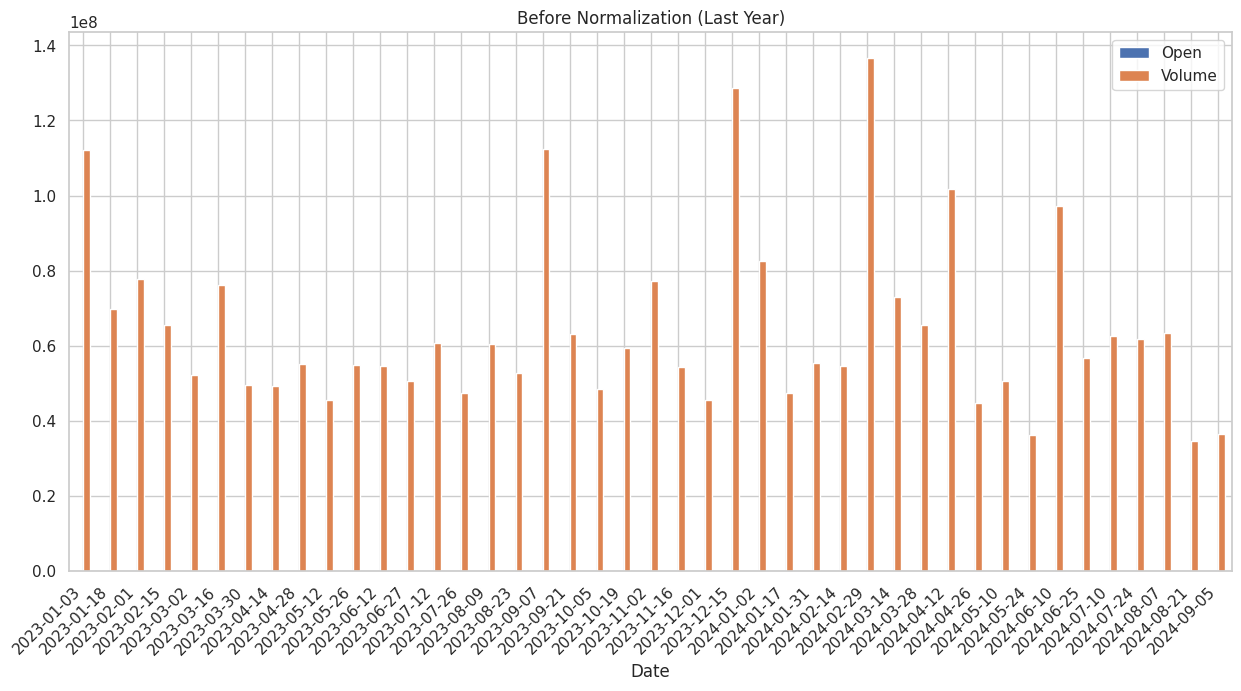

After Manual Normalization (Last Year)
       Open_normalized_manual  Volume_normalized_manual
count              422.000000                422.000000
mean                 0.502334                  0.162016
std                  0.198774                  0.101226
min                  0.000000                  0.000000
25%                  0.397393                  0.104800
50%                  0.497330                  0.136056
75%                  0.593872                  0.189325
max                  1.000000                  1.000000


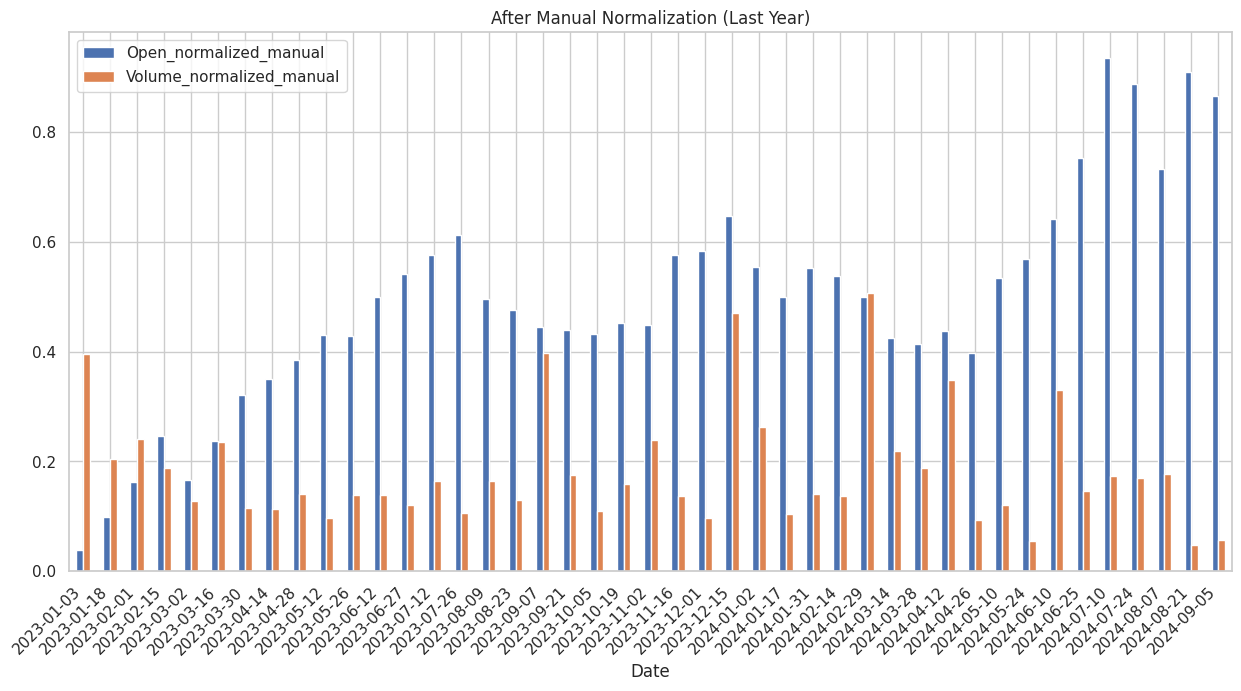

After Automated Normalization (Last Year)
       Volume_normalized_auto  Low_normalized_auto
count              422.000000           422.000000
mean                 0.162016             0.512748
std                  0.101226             0.198754
min                  0.000000             0.000000
25%                  0.104800             0.410049
50%                  0.136056             0.503443
75%                  0.189325             0.611653
max                  1.000000             1.000000


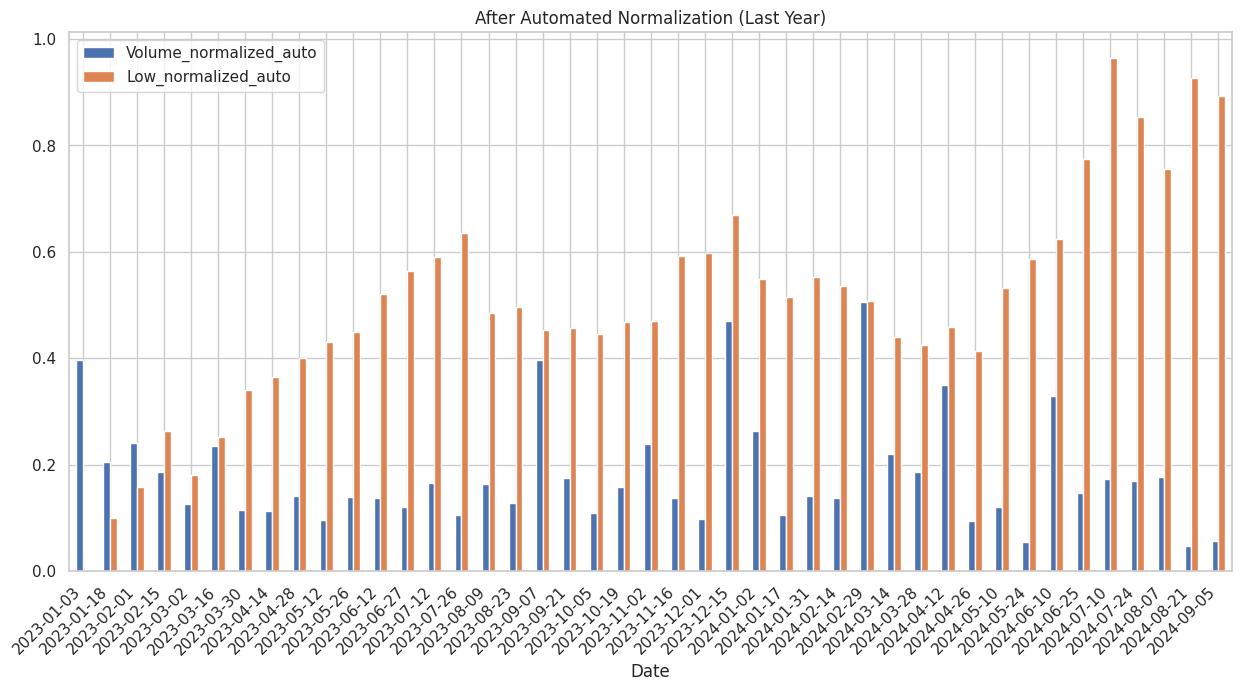

In [131]:
# Describing before normalization
print("Before Normalization (Last Year)")
print(apple_last_year[['Open', 'Volume']].describe())

# Plot before any normalization (for the last year)
fig, ax = plt.subplots(figsize=(15, 7))
# Only plot every 10th data point to reduce crowding
apple_last_year[['Open', 'Volume']][::10].plot(kind='bar', ax=ax)
ax.set_xticks(range(0, len(apple_last_year[::10])))  # Show every 10th label
ax.set_xticklabels(apple_last_year.index[::10].strftime('%Y-%m-%d'), rotation=45, ha='right')
plt.title('Before Normalization (Last Year)')
plt.show()

# Describing after manual normalization
print("After Manual Normalization (Last Year)")
print(apple_last_year[['Open_normalized_manual', 'Volume_normalized_manual']].describe())

# Plot after manual normalization
fig, ax = plt.subplots(figsize=(15, 7))
apple_last_year[['Open_normalized_manual', 'Volume_normalized_manual']][::10].plot(kind='bar', ax=ax)
ax.set_xticks(range(0, len(apple_last_year[::10])))  # Show every 10th label
ax.set_xticklabels(apple_last_year.index[::10].strftime('%Y-%m-%d'), rotation=45, ha='right')
plt.title('After Manual Normalization (Last Year)')
plt.show()

# Describing after automated normalization
print("After Automated Normalization (Last Year)")
print(apple_last_year[['Volume_normalized_auto', 'Low_normalized_auto']].describe())

# Plot after automated normalization
fig, ax = plt.subplots(figsize=(15, 7))
apple_last_year[['Volume_normalized_auto', 'Low_normalized_auto']][::10].plot(kind='bar', ax=ax)
ax.set_xticks(range(0, len(apple_last_year[::10])))  # Show every 10th label
ax.set_xticklabels(apple_last_year.index[::10].strftime('%Y-%m-%d'), rotation=45, ha='right')
plt.title('After Automated Normalization (Last Year)')
plt.show()

###**3.2 Data Standarization**

**3.2.1 Manual Standardization**

In [132]:
#Defines a function that uses the formula of data standarization
def standardize(column):
    return (column - column.mean()) / column.std()

# Manual Standardization on 'Open' and 'Close' for the last year using
apple_last_year2 = apple.loc['2023':'2024'].copy()  # Make a copy of the sliced DataFrame to avoid warnings
apple_last_year2.loc[:, 'Volume_standardized_manual'] = standardize(apple_last_year2['Volume'])
apple_last_year2.loc[:, 'Close_standardized_manual'] = standardize(apple_last_year2['Close'])

<Axes: xlabel='Close', ylabel='Density'>

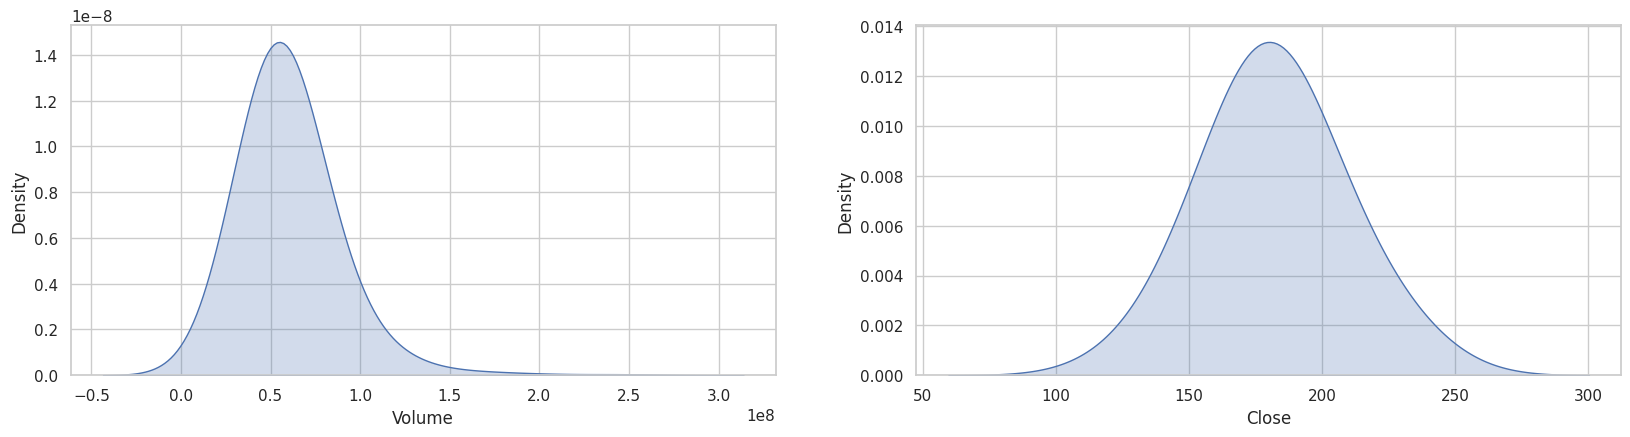

In [133]:
# Make default density plot
plt.figure(figsize = (20, 10,))
sns.set_theme(style="whitegrid")
plt.subplot(221)
sns.kdeplot(apple_last_year2['Volume'], fill=True, bw_method=1, label='Volume')
plt.subplot(222)
sns.kdeplot(apple_last_year2['Close'], fill=True, bw_method=1, label='Close')

Before Manual Standardization (Last Year)
             Volume       Close
count  4.220000e+02  422.000000
mean   6.007632e+07  181.709739
std    2.250994e+07   21.795410
min    2.404834e+07  125.020000
25%    4.735312e+07  169.755000
50%    5.430359e+07  180.850000
75%    6.614916e+07  192.172500
max    2.464214e+08  234.820000


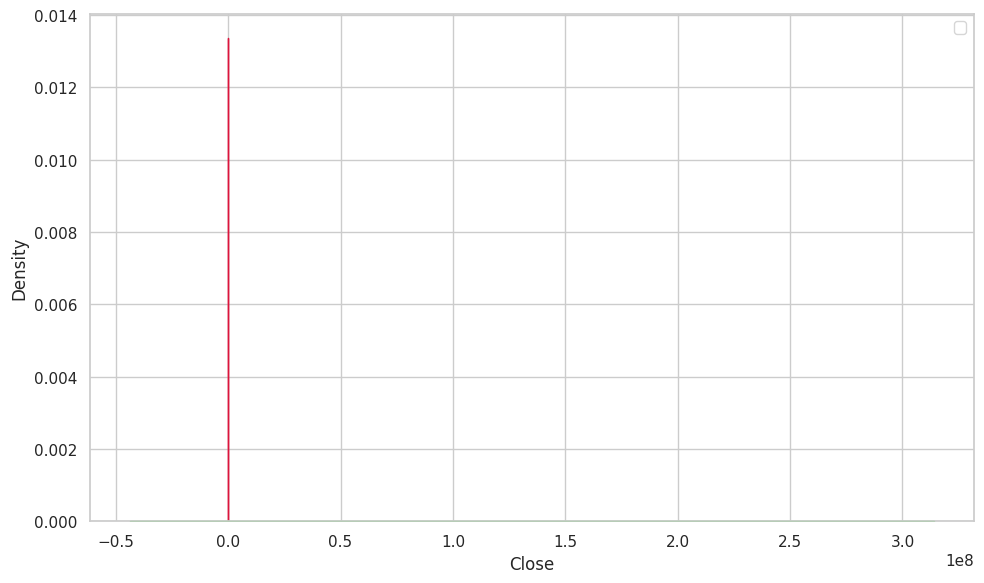

In [134]:
print("Before Manual Standardization (Last Year)")
print(apple_last_year2[['Volume', 'Close']].describe())
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=apple_last_year2['Close'], fill=True, bw_method=1, color='crimson',ax=ax)
sns.kdeplot(data=apple_last_year2['Volume'], fill=True, bw_method=1,color='limegreen', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

After Manual Standardization (Last Year)
       Volume_standardized_manual  Close_standardized_manual
count                4.220000e+02               4.220000e+02
mean                -1.325954e-16              -4.377751e-16
std                  1.000000e+00               1.000000e+00
min                 -1.600537e+00              -2.600994e+00
25%                 -5.652261e-01              -5.484980e-01
50%                 -2.564527e-01              -3.944589e-02
75%                  2.697846e-01               4.800442e-01
max                  8.278346e+00               2.436764e+00


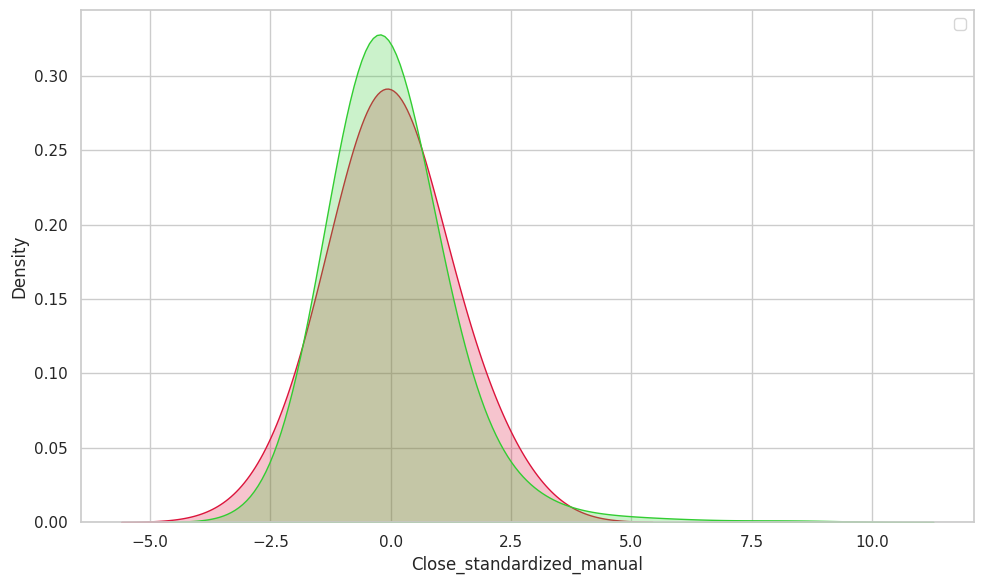

In [135]:
print("After Manual Standardization (Last Year)")
print(apple_last_year2[['Volume_standardized_manual', 'Close_standardized_manual']].describe())
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=apple_last_year2['Close_standardized_manual'], fill=True, bw_method=1, color='crimson',ax=ax)
sns.kdeplot(data=apple_last_year2['Volume_standardized_manual'], fill=True, bw_method=1,color='limegreen', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

**3.2.2 Automated Standardization**

In [136]:
# Automated Standardization on 'High' and 'Low' for the last year using StandardScaler and .loc[]
scaler = StandardScaler()
apple_last_year2.loc[:, ['High_standardized_auto', 'Volume_standardized_auto']] = scaler.fit_transform(apple_last_year2[['High', 'Volume']])

<Axes: xlabel='Volume', ylabel='Density'>

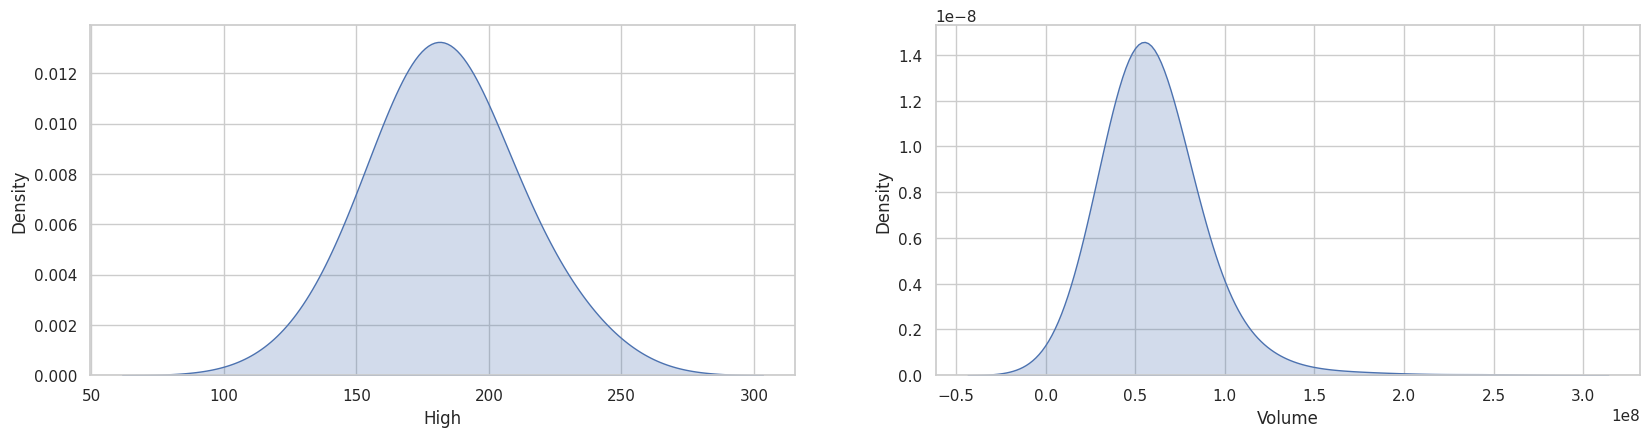

In [137]:
# Make default density plot
plt.figure(figsize = (20, 10,))
sns.set_theme(style="whitegrid")
plt.subplot(221)
sns.kdeplot(apple_last_year2['High'], fill=True, bw_method=1, label='Volume')
plt.subplot(222)
sns.kdeplot(apple_last_year2['Volume'], fill=True, bw_method=1, label='Close')

Before Automated Standardization (Last Year)
             Volume        High
count  4.220000e+02  422.000000
mean   6.007632e+07  183.229209
std    2.250994e+07   22.031295
min    2.404834e+07  127.770000
25%    4.735312e+07  171.388125
50%    5.430359e+07  182.385000
75%    6.614916e+07  192.995000
max    2.464214e+08  237.230000


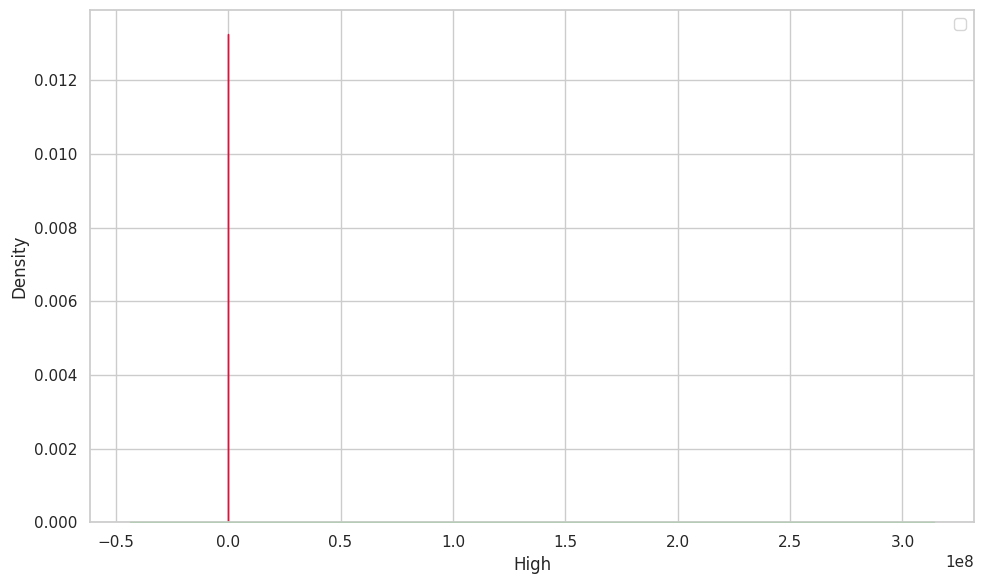

In [138]:
print("Before Automated Standardization (Last Year)")
print(apple_last_year2[['Volume', 'High']].describe())
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=apple_last_year2['High'], fill=True, bw_method=1, color='crimson',ax=ax)
sns.kdeplot(data=apple_last_year2['Volume'], fill=True, bw_method=1,color='limegreen', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

After automated Standardization (Last Year)
       High_standardized_auto  Volume_standardized_auto
count            4.220000e+02              4.220000e+02
mean            -5.051252e-16             -1.410141e-16
std              1.001187e+00              1.001187e+00
min             -2.520280e+00             -1.602436e+00
25%             -5.381045e-01             -5.658970e-01
50%             -3.836412e-02             -2.567571e-01
75%              4.437952e-01              2.701048e-01
max              2.454004e+00              8.288172e+00


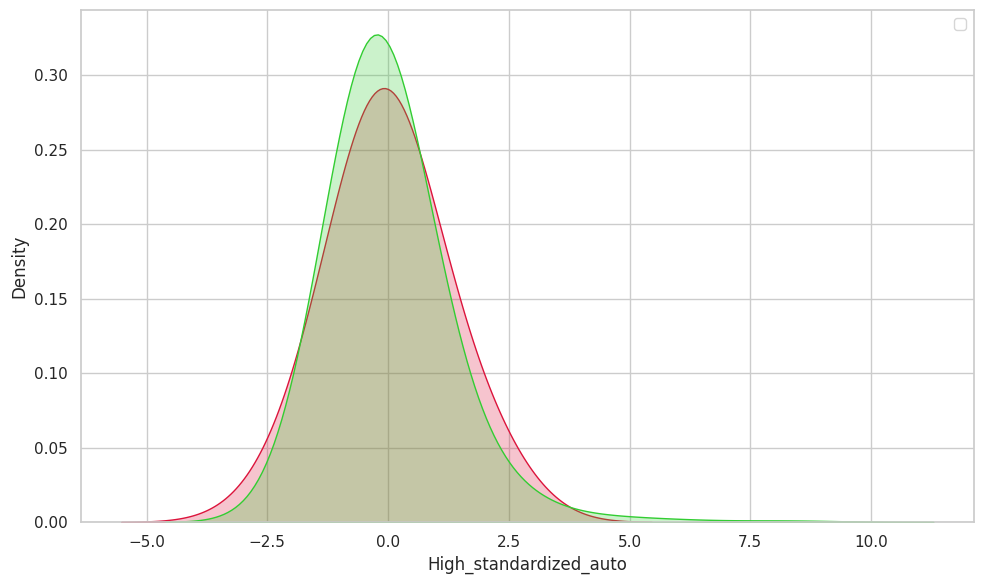

In [139]:
print("After automated Standardization (Last Year)")
print(apple_last_year2[['High_standardized_auto', 'Volume_standardized_auto']].describe())
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=apple_last_year2['High_standardized_auto'], fill=True, bw_method=1, color='crimson',ax=ax)
sns.kdeplot(data=apple_last_year2['Volume_standardized_auto'], fill=True, bw_method=1,color='limegreen', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

###**3.3 Logarithmic Transform**

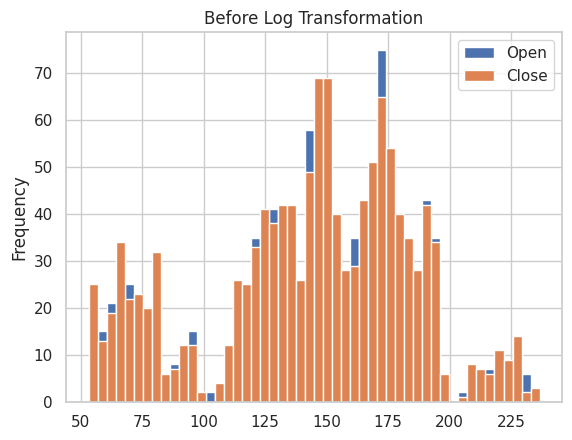

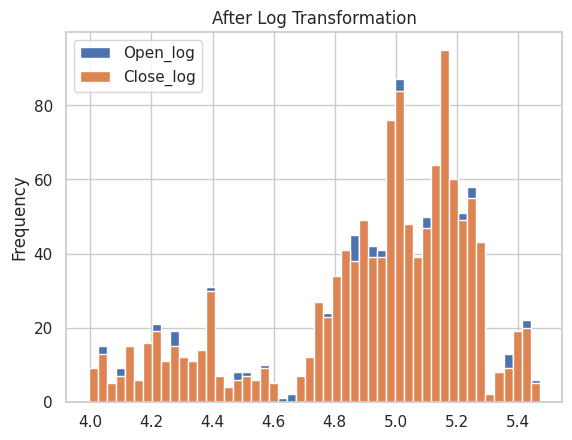

In [140]:
#Uses the numpy function to calculate the natural logarithm (log base e) for open and close.
apple['Open_log'] = np.log(apple['Open'] + 1)
apple['Close_log'] = np.log(apple['Close'] + 1)

# Plot before and after log transform
apple[['Open', 'Close']].plot(kind='hist', bins=50)
plt.title('Before Log Transformation')
plt.show()

apple[['Open_log', 'Close_log']].plot(kind='hist', bins=50)
plt.title('After Log Transformation')
plt.show()

Applying a log transformation to stock prices, like Apple's open and close data, doesn’t make sense here. Stock prices are already on a suitable scale and don’t have extreme outliers or skewness that would need this kind of adjustment. Log transformations are better for data with large ranges or heavy tails, which isn’t the case with stock prices. Instead of adding value, transforming these prices just distorts the actual numbers. In stock analysis, it's more useful to apply logs to percentage changes or returns, where it actually provides meaningful insights, rather than the raw price data.

###**3.4 Discretization Transform**

**3.4.1 Decisions Trees**

In [141]:
X = apple[['Open']]  # 'Open' price column as the feature
y = apple['Open']  # The target is the same as the feature (unsupervised discretization)

# Initialize the Decision Tree Regressor and fit to the data
tree = DecisionTreeRegressor(max_leaf_nodes=5)  # We use 5 bins (leaf nodes)
tree.fit(X, y)

# The predictions will indicate the bin each value belongs to
apple['Open_binned_tree'] = tree.apply(X)

apple[['Open', 'Open_binned_tree']]

,Open,Open_binned_tree
Date,,
2019-09-06,53.5125,5
2019-09-09,53.7100,5
2019-09-10,53.4650,5
2019-09-11,54.5175,5
2019-09-12,56.2000,5
...,...,...
2024-08-30,230.1900,8
2024-09-03,228.5500,8
2024-09-04,221.6600,8


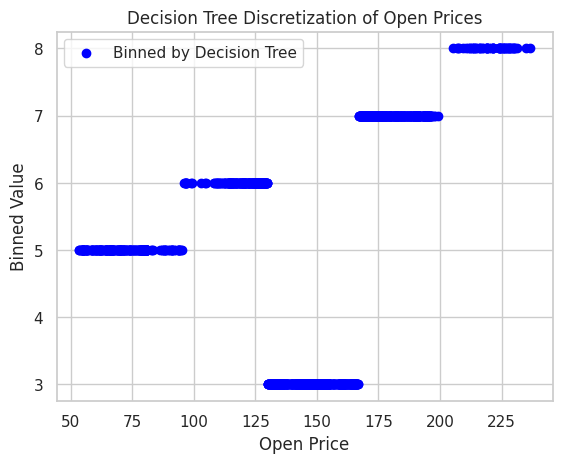

In [142]:
# Plot the original 'Open' values vs. the bins created by DecisionTreeRegressor
plt.scatter(apple['Open'], apple['Open_binned_tree'], color='blue', label='Binned by Decision Tree')
plt.xlabel('Open Price')
plt.ylabel('Binned Value')
plt.title('Decision Tree Discretization of Open Prices')
plt.legend()
plt.show()